In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
filepath="/content/drive/MyDrive/Colab Notebooks"

Mounted at /content/drive


In [ ]:
df1=pd.read_csv(f"{filepath}/Stock_VCB_filled.csv")
df2=pd.read_csv(f"{filepath}/Stock_VNindex_filled.csv")

In [ ]:
df1

,date,code,high,low,open,close,volume_match
0,10/1/2019,VCB,83.6,81.8,82.1,83.4,795100
1,10/2/2019,VCB,83.7,81.7,83.4,82.0,1224650
2,10/3/2019,VCB,82.0,80.6,81.8,82.0,1003810
3,10/4/2019,VCB,83.5,81.8,82.0,83.0,1121700
4,10/7/2019,VCB,84.5,82.8,82.0,82.8,1134390
...,...,...,...,...,...,...,...
1366,12/25/2024,VCB,93.8,92.2,92.2,92.4,1827700
1367,12/26/2024,VCB,92.8,92.0,92.5,92.1,2202900
1368,12/27/2024,VCB,93.0,92.2,92.5,92.2,1639900
1369,12/30/2024,VCB,92.5,92.0,92.2,92.0,1706700


In [ ]:
# Convert 'date' column to pandas datetime format
df1['date'] = pd.to_datetime(df1['date'])  # Convert to datetime
df1.set_index('date', inplace=True)  # Set as index, so that pandas can handle timeseries
df1 = df1.sort_index()  # Ensure it's sorted

In [ ]:
df1

,code,high,low,open,close,volume_match
date,,,,,,
2019-10-01,VCB,83.6,81.8,82.1,83.4,795100
2019-10-02,VCB,83.7,81.7,83.4,82.0,1224650
2019-10-03,VCB,82.0,80.6,81.8,82.0,1003810
2019-10-04,VCB,83.5,81.8,82.0,83.0,1121700
2019-10-07,VCB,84.5,82.8,82.0,82.8,1134390
...,...,...,...,...,...,...
2024-12-25,VCB,93.8,92.2,92.2,92.4,1827700
2024-12-26,VCB,92.8,92.0,92.5,92.1,2202900
2024-12-27,VCB,93.0,92.2,92.5,92.2,1639900


In [ ]:
# Convert 'date' column to pandas datetime format
df2['date'] = pd.to_datetime(df2['date'])  # Convert to datetime
df2.set_index('date', inplace=True)  # Set as index, so that pandas can handle timeseries
df2 = df2.sort_index()  # Ensure it's sorted

In [ ]:
df2

,code,high,low,open,close,adjust,volume_match,value_match
date,,,,,,,,
2019-10-01,VNINDEX,999.72,996.20,997.87,999.59,999.59,138885870.0,3.113323e+12
2019-10-02,VNINDEX,1000.93,989.63,999.18,991.19,991.19,152337130.0,3.552889e+12
2019-10-03,VNINDEX,992.45,983.35,985.65,992.45,992.45,153492420.0,3.243848e+12
2019-10-04,VNINDEX,994.81,987.59,993.69,987.59,987.59,150673460.0,3.264212e+12
2019-10-07,VNINDEX,990.34,983.09,989.45,983.09,983.09,147636100.0,3.089197e+12
...,...,...,...,...,...,...,...,...
2024-12-25,VNINDEX,1283.09,1261.87,1262.03,1274.04,1274.04,724345690.0,1.651200e+13
2024-12-26,VNINDEX,1277.17,1271.99,1275.68,1272.87,1272.87,502071890.0,1.064038e+13
2024-12-27,VNINDEX,1277.89,1272.23,1275.56,1275.14,1275.14,579882989.0,1.328606e+13


In [ ]:
# Tính EMA 12 ngày và EMA 26 ngày
df2['ema_12'] = df2['close'].ewm(span=12, adjust=False).mean()
df2['ema_26'] = df2['close'].ewm(span=26, adjust=False).mean()

# Tính MACD
df2['macd'] = df2['ema_12'] - df2['ema_26']

# Tính Signal Line (EMA 9 ngày của MACD)
df2['macd_signal'] = df2['macd'].ewm(span=9, adjust=False).mean()

# Hiển thị kết quả
print(df2[['close', 'macd', 'macd_signal']].head())


             close      macd  macd_signal
date                                     
2019-10-01  999.59  0.000000     0.000000
2019-10-02  991.19 -0.670085    -0.134017
2019-10-03  992.45 -1.086932    -0.324600
2019-10-04  987.59 -1.788827    -0.617445
2019-10-07  983.09 -2.677333    -1.029423


In [ ]:
df2

,code,high,low,open,close,adjust,volume_match,value_match,ema_12,ema_26,macd,macd_signal
date,,,,,,,,,,,,
2019-10-01,VNINDEX,999.72,996.20,997.87,999.59,999.59,138885870.0,3.113323e+12,999.590000,999.590000,0.000000,0.000000
2019-10-02,VNINDEX,1000.93,989.63,999.18,991.19,991.19,152337130.0,3.552889e+12,998.297692,998.967778,-0.670085,-0.134017
2019-10-03,VNINDEX,992.45,983.35,985.65,992.45,992.45,153492420.0,3.243848e+12,997.398047,998.484979,-1.086932,-0.324600
2019-10-04,VNINDEX,994.81,987.59,993.69,987.59,987.59,150673460.0,3.264212e+12,995.889117,997.677944,-1.788827,-0.617445
2019-10-07,VNINDEX,990.34,983.09,989.45,983.09,983.09,147636100.0,3.089197e+12,993.920022,996.597355,-2.677333,-1.029423
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,VNINDEX,1283.09,1261.87,1262.03,1274.04,1274.04,724345690.0,1.651200e+13,1262.507215,1258.347473,4.159742,3.725967
2024-12-26,VNINDEX,1277.17,1271.99,1275.68,1272.87,1272.87,502071890.0,1.064038e+13,1264.101490,1259.423215,4.678274,3.916428
2024-12-27,VNINDEX,1277.89,1272.23,1275.56,1275.14,1275.14,579882989.0,1.328606e+13,1265.799722,1260.587422,5.212300,4.175603


In [ ]:
df3=pd.read_csv(f"{filepath}/bullish_index_summary.csv")

In [ ]:
df3

,date,total_articles,bullish_index,dominant_sentiment
0,2019-10-01,12,0.625000,neutral
1,2019-10-02,13,0.769231,positive
2,2019-10-03,12,0.625000,positive
3,2019-10-04,22,0.659091,positive
4,2019-10-07,17,0.441176,negative
...,...,...,...,...
1366,2024-12-25,44,0.625000,neutral
1367,2024-12-26,43,0.639535,positive
1368,2024-12-27,56,0.580357,positive
1369,2024-12-30,47,0.574468,positive


In [ ]:
# Convert 'date' column to pandas datetime format
df3['date'] = pd.to_datetime(df3['date'])  # Convert to datetime
df3.set_index('date', inplace=True)  # Set as index, so that pandas can handle timeseries
df3 = df3.sort_index()  # Ensure it's sorted

In [ ]:
df3

,total_articles,bullish_index,dominant_sentiment
date,,,
2019-10-01,12,0.625000,neutral
2019-10-02,13,0.769231,positive
2019-10-03,12,0.625000,positive
2019-10-04,22,0.659091,positive
2019-10-07,17,0.441176,negative
...,...,...,...
2024-12-25,44,0.625000,neutral
2024-12-26,43,0.639535,positive
2024-12-27,56,0.580357,positive


In [ ]:
# Mã hóa sentiment thành các giá trị số
df3['sentiment_encoded'] = df3['dominant_sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

# Kiểm tra kết quả
# Use df3.index to access the date which is now the index
print(df3[['dominant_sentiment', 'sentiment_encoded']].head())
print(df3.index[:5]) # Print the first 5 dates from the index


           dominant_sentiment  sentiment_encoded
date                                            
2019-10-01            neutral                  0
2019-10-02           positive                  1
2019-10-03           positive                  1
2019-10-04           positive                  1
2019-10-07           negative                 -1
DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-07'],
              dtype='datetime64[ns]', name='date', freq=None)


In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import os  # Import the os module
import tensorflow as tf

In [ ]:
# Load data (giả sử dữ liệu đã được tải vào biến 'df1', 'df2', 'df3')

df_combined = pd.DataFrame()
df_combined['vcb_close'] = df1['close']
df_combined['volume_match'] = df1['volume_match']
df_combined['sentiment'] = df3['sentiment_encoded']

# Lọc dữ liệu từ 1/1/2020 đến 31/12/2024
df_combined = df_combined.loc['2020-01-01':'2024-12-31']

# Kiểm tra và xử lý missing values
df_combined = df_combined.dropna()
print(f"Shape of combined data after filtering time: {df_combined.shape}")
print(f"Date range: {df_combined.index.min()} to {df_combined.index.max()}")


Shape of combined data after filtering time: (1305, 3)
Date range: 2020-01-01 00:00:00 to 2024-12-31 00:00:00


In [ ]:
df_combined

,vcb_close,volume_match,sentiment
date,,,
2020-01-01,90.2,230770,1
2020-01-02,90.8,386290,1
2020-01-03,89.9,536130,1
2020-01-06,87.5,880110,0
2020-01-07,87.8,1013270,1
...,...,...,...
2024-12-25,92.4,1827700,0
2024-12-26,92.1,2202900,1
2024-12-27,92.2,1639900,1


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0663 - val_loss: 0.0050
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0056 - val_loss: 0.0019
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0043 - val_loss: 0.0015
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0038 - val_loss: 0.0010
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0034 - val_loss: 8.5419e-04
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0032 - val_loss: 8.0521e-04
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0031 - val_loss: 8.0694e-04
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0031 - val_loss: 7.4139e-04
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0029 - val_loss: 6.5781e-04
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0027 - val_loss: 6.1525e-04
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0025 - val_loss: 5.9290e-04
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms

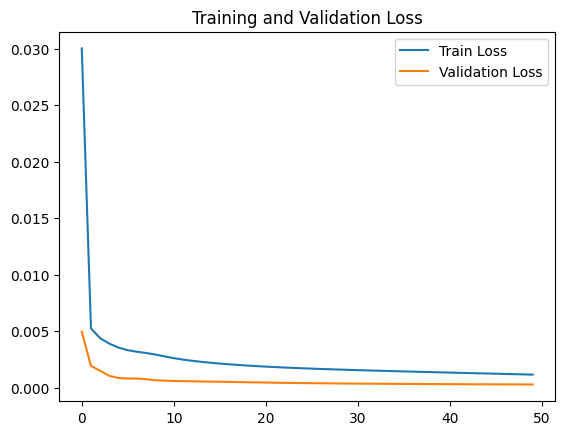

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
RMSE: 0.988592
MAE: 0.689854
MPAE: 0.755922%


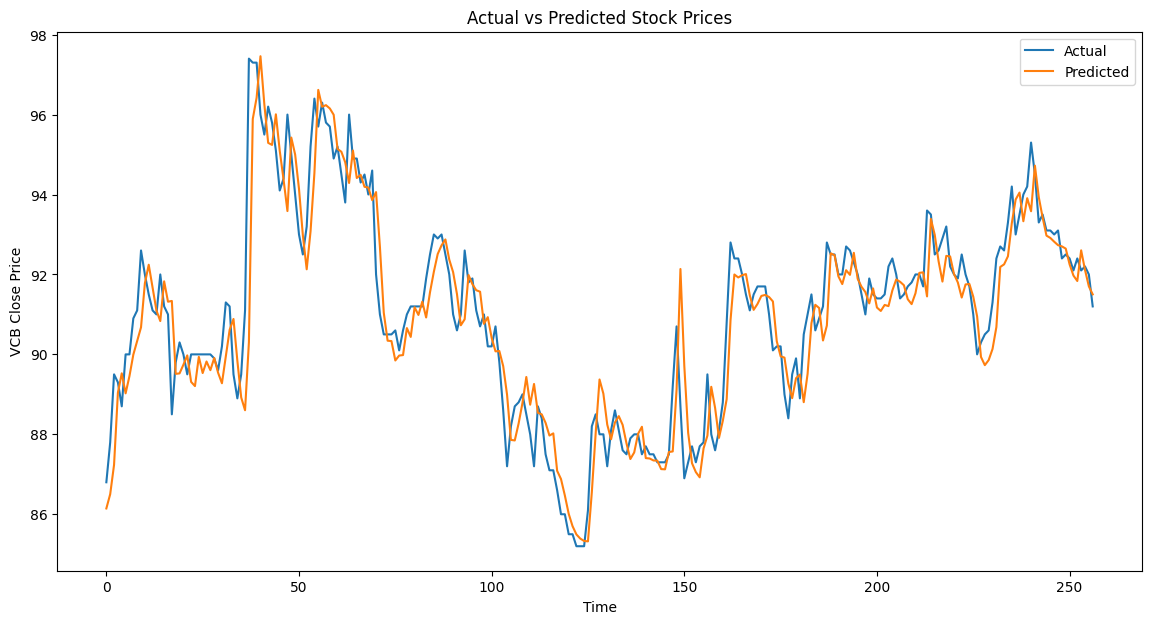

In [ ]:
import keras.backend as K
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random
import os
from sklearn.model_selection import train_test_split

# Đặt seed cố định để tái lập kết quả
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Chạy trên CPU để đảm bảo tính xác định
tf.config.experimental.enable_op_determinism()
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)

# Xóa session cũ để tránh ảnh hưởng
K.clear_session()
tf.keras.backend.clear_session()

# Giả sử df_combined đã có sẵn
FEATURES = ['vcb_close','volume_match','sentiment']
TARGET = ['vcb_close']

# Chia tập train/test trước khi chuẩn hóa
train_size = int(len(df_combined) * 0.8)
df_train = df_combined.iloc[:train_size]
df_test = df_combined.iloc[train_size:]

# Fit scaler trên tập train
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train[FEATURES])  # Fit và transform trên train
df_test_scaled = scaler.transform(df_test[FEATURES])  # Chỉ transform trên test

# Fit scaler cho giá trị mục tiêu
scaler_target = MinMaxScaler()
scaler_target.fit(df_train[TARGET])  # Chỉ fit trên cột mục tiêu

# Gộp lại để dùng cho LSTM
df_combined_scaled = np.vstack([df_train_scaled, df_test_scaled])

sequence_length = 20

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])  # Include all features in X
        y.append(data[i+seq_length, 0])  # Cột mục tiêu (vcb_close) là cột đầu tiên
    return np.array(X), np.array(y)

X, y = create_sequences(df_combined_scaled, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Xây dựng mô hình LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, len(FEATURES))),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Vẽ biểu đồ loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Dự đoán
predictions = model.predict(X_test)

# Chuyển đổi về giá trị thực tế
predictions = scaler_target.inverse_transform(predictions.reshape(-1, 1)).flatten()
y_test_real = scaler_target.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test_real, predictions))
mae = mean_absolute_error(y_test_real, predictions)

# Tính Mean Percentage Absolute Error (MPAE)
mpae = np.mean(np.abs((y_test_real - predictions) / y_test_real)) * 100

# In kết quả đánh giá
print(f'RMSE: {rmse:.6f}')
print(f'MAE: {mae:.6f}')
print(f'MPAE: {mpae:.6f}%')


# Vẽ biểu đồ kết quả dự đoán so với thực tế
plt.figure(figsize=(14, 7))
plt.plot(y_test_real, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("VCB Close Price")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
         Date  Predicted_Price
0  2025-01-01        91.501789
1  2025-01-02        91.830453
2  2025-01-03        91.412579
3  2025-01-06        91.591405
4  2025-01-07        91.089431
5  2025-01-08        91.253916
6  2025-01-09        90.643487
7  2025-01-10        90.553049
8  2025-01-13        90.199815
9  2025-01-14        90.112747
10 2025-01-15        89.946653
11 2025-01-16        89.766066
12 2025-01-17        89.529

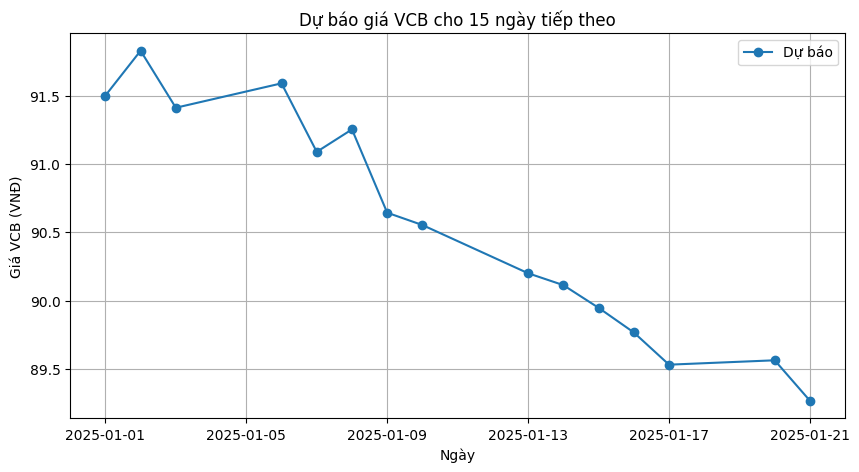

In [ ]:
# Dự báo 15 ngày tiếp theo
def predict_next_days(model, last_sequence, num_days, scaler, feature_count):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(num_days):
        next_pred = model.predict(current_sequence[np.newaxis, :, :])
        predictions.append(next_pred[0, 0])

        # Dịch chuỗi và cập nhật đúng cột 'vcb_close'
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1, 0] = next_pred[0, 0]  # Cột đầu tiên là 'vcb_close'

    # Tạo dummy array để inverse_transform đúng
    dummy = np.zeros((num_days, feature_count))
    dummy[:, 0] = predictions  # Đặt giá trị dự đoán vào đúng vị trí cột đầu tiên (vcb_close)

    predictions_real = scaler.inverse_transform(dummy)[:, 0]  # Lấy lại giá trị thực của 'vcb_close'
    return predictions_real

# Dự báo 15 ngày tiếp theo
last_sequence = X_test[-1]
predicted_next_15_days = predict_next_days(model, last_sequence, 15, scaler, len(FEATURES))

# Tạo DataFrame để hiển thị kết quả
dates = pd.date_range(start='2025-01-01', periods=15, freq='B')  # Giả sử bắt đầu từ 2025-01-01, chỉ tính ngày làm việc
df_forecast = pd.DataFrame({'Date': dates, 'Predicted_Price': predicted_next_15_days})
print(df_forecast)

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(df_forecast['Date'], df_forecast['Predicted_Price'], marker='o', label="Dự báo")
plt.xlabel("Ngày")
plt.ylabel("Giá VCB (VNĐ)")
plt.title("Dự báo giá VCB cho 15 ngày tiếp theo")
plt.legend()
plt.grid()
plt.show()

# Lưu mô hình
model.save('lstm_stock_model.h5')
